In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Kullanacağımız kütüphaneleri indiridik.
# We downloaded the libraries we will use.

In [3]:
df1=pd.read_csv("netflix_titles_2021.csv") # Datayı df1 değişkenine atadık.

In [4]:
df=df1.copy() # Data yedek kopyasını oluşturduk.

In [5]:
df.head(5) # Data setindeki ilk beş satırı gösterdik.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df.shape

(8807, 12)

## Data temizleme

In [8]:
df.duplicated().value_counts() #Data içersindeki benzer satır kontrolleri yapıldı yapdı.Benzer satır tespit edilmedi. 

False    8807
Name: count, dtype: int64

In [9]:
df.info() # Data setindeki satır ve sütun bilgilerini inceledim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


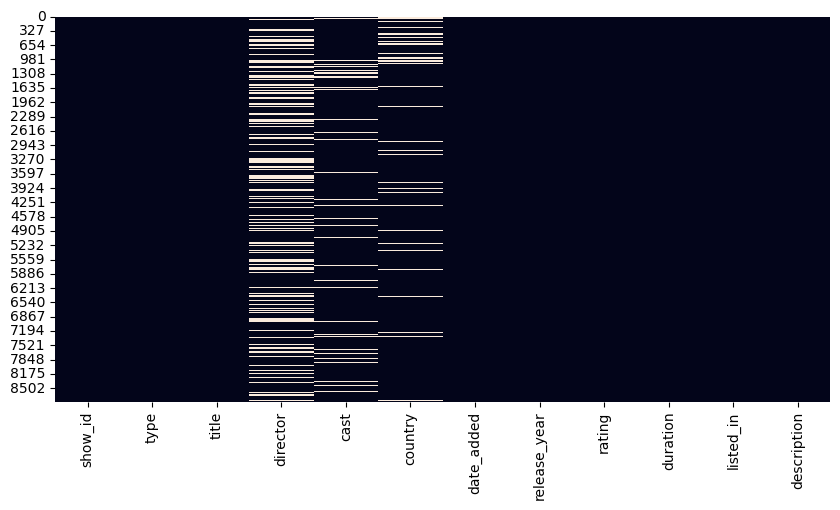

In [10]:
plt.figure(figsize=(10,5))            # eksik değerlerin varlığını headmap grafiği ile görselleştirdik.
sns.heatmap(df.isnull(), cbar=False); #Grafikte ki beyaz çizgiler eksik verileri temsil etmektedir.

In [11]:
df.isna().sum()    # Null değerlerin sayılarını tespit ettik.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [12]:
df.nunique()  # Columns larda bulunan unıque değerlerin sayısal tespiti yapıldı.ç

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [14]:
# director, cast ve country sütunlarındaki eksik değerler 'Unknown' (Bilinmeyen) olarak doldurduk.
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown') 

In [15]:
df.isna().sum() # yapılan işlem sonucunu gözlemledik.

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [16]:
# rating sütunundaki eksik değerler, bu sütunun modu (en sık görülen değeri) ile doldurduk.
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [17]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [18]:
df.dropna(axis=0, inplace = True) #Kalan eksik veriler date_added ve duration değerler silindi.

In [19]:
df.isna().sum() 

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
df.shape #satır sütun sayısını inceledik.

(8794, 12)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8794 non-null   object
 1   type          8794 non-null   object
 2   title         8794 non-null   object
 3   director      8794 non-null   object
 4   cast          8794 non-null   object
 5   country       8794 non-null   object
 6   date_added    8794 non-null   object
 7   release_year  8794 non-null   int64 
 8   rating        8794 non-null   object
 9   duration      8794 non-null   object
 10  listed_in     8794 non-null   object
 11  description   8794 non-null   object
dtypes: int64(1), object(11)
memory usage: 893.1+ KB


In [22]:
#  Bu açıklamada, çoklu ülke ve tür bilgisine sahip filmler/diziler
# ile ilgili analizlerin basitleştirilmesi amaçlanıyor. İşte ne yapmanız gerektiği:
#  Birincil Ülke: Eğer bir film veya dizi birden fazla ülkede çekilmişse,
# sadece birincil (ana) ülkeyi dikkate almanız öneriliyor. Yani, hangi ülkenin film/dizi için ana ülke olarak
# kabul edildiği belirlenmeli ve sadece o ülke kullanılmalıdır.
#  Birincil Tür: Benzer şekilde, bir film veya dizi birden fazla tür ile ilişkilendirilmişse,
# sadece birincil (ana) türü kullanarak analizi basitleştirmelisiniz.
# Yani, hangi türün film/dizi için ana tür olduğu belirlenmeli ve sadece o tür kullanılmalıdır.

In [23]:
df.country.value_counts() # country sütunudaki verilerin kaç kez tekralandığını hesapladı

country
United States                                                                                                                  2809
India                                                                                                                           972
Unknown                                                                                                                         830
United Kingdom                                                                                                                  418
Japan                                                                                                                           244
South Korea                                                                                                                     199
Canada                                                                                                                          181
Spain                                                               

In [24]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0]) # Countr sütunudaki çoklu ülke isimlerini birincil ülke isimleri ile doldurduk.

In [25]:
df.listed_in.value_counts()# liste_in sütunudaki verilerin kaç kez tekralandığını hesapladı

listed_in
Dramas, International Movies                                                       362
Documentaries                                                                      359
Stand-Up Comedy                                                                    334
Comedies, Dramas, International Movies                                             274
Dramas, Independent Movies, International Movies                                   252
Kids' TV                                                                           219
Children & Family Movies                                                           215
Children & Family Movies, Comedies                                                 201
Documentaries, International Movies                                                186
Dramas, International Movies, Romantic Movies                                      180
Comedies, International Movies                                                     176
Comedies, International Movies, R

In [26]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0]) # listed_in sütunudaki çoklu film türü isimlerini birincil filmtürü isimleri ile doldurduk.

In [27]:
df.country.value_counts()

country
United States           3202
India                   1008
Unknown                  830
United Kingdom           627
Canada                   271
Japan                    258
France                   212
South Korea              211
Spain                    181
Mexico                   134
Australia                116
Egypt                    112
Turkey                   111
Germany                  103
China                    100
Nigeria                   96
Indonesia                 85
Taiwan                    85
Brazil                    84
Philippines               80
Hong Kong                 79
Argentina                 76
Italy                     67
Thailand                  65
South Africa              41
Colombia                  40
Denmark                   30
Poland                    30
Singapore                 28
Netherlands               28
Ireland                   28
Lebanon                   24
Malaysia                  23
Israel                    22
Chile 

In [28]:
df.listed_in.value_counts()

listed_in
Dramas                          1600
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         386
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     175
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            54
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals            

In [29]:
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0])) #Duraction daki string ifadeleri kaldırdık ve int çevirdik.

In [30]:
df[df['type']=='TV Show'].duration.value_counts()# Sezonluk çekimi yapılan Tv Show ların sezon sayıları getirildi.

duration
1     1793
2      421
3      198
4       94
5       64
6       33
7       23
8       17
9        9
10       6
13       2
15       2
12       2
17       1
11       1
Name: count, dtype: int64

In [31]:
df[df['type']=='Movie'].duration.unique()# Süreli olarak çekimi yapılan film sürelerini getirdi.Unıque olarak.

array([ 90,  91, 125, 104, 127,  67,  94, 161,  61, 166, 147, 103,  97,
       106, 111, 110, 105,  96, 124, 116,  98,  23, 115, 122,  99,  88,
       100, 102,  93,  95,  85,  83, 113,  13, 182,  48, 145,  87,  92,
        80, 117, 128, 119, 143, 114, 118, 108,  63, 121, 142, 154, 120,
        82, 109, 101,  86, 229,  76,  89, 156, 112, 107, 129, 135, 136,
       165, 150, 133,  70,  84, 140,  78,  64,  59, 139,  69, 148, 189,
       141, 130, 138,  81, 132, 123,  65,  68,  66,  62,  74, 131,  39,
        46,  38, 126, 155, 159, 137,  12, 273,  36,  34,  77,  60,  49,
        58,  72, 204, 212,  25,  73,  29,  47,  32,  35,  71, 149,  33,
        15,  54, 224, 162,  37,  75,  79,  55, 158, 164, 173, 181, 185,
        21,  24,  51, 151,  42,  22, 134, 177,  52,  14,  53,   8,  57,
        28,  50,   9,  26,  45, 171,  27,  44, 146,  20, 157,  17, 203,
        41,  30, 194, 233, 237, 230, 195, 253, 152, 190, 160, 208, 180,
       144,   5, 174, 170, 192, 209, 187, 172,  16, 186,  11, 19

In [33]:
df['date_added']=df['date_added'].str.lstrip() #date_added sütunu içerisindeki sol taraftaki boşluk karakterler silindi.

In [34]:
df["date_added"] = pd.to_datetime(df['date_added']) #date_added sütunu formatı object türünden datetime a çevrildi.

In [35]:
df['date_added'].min(),df['date_added'].max() # Netflix sistemine 2008-01-01 & 2021-09-25 tarihleri arasında yükleme yapılmıştır.

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-09-25 00:00:00'))

In [36]:
df['month_added'] = df['date_added'].dt.month  #Tarihlerin ay kısmı  için ayrı sütun oluşturduk.

In [37]:
df['year_added'] = df['date_added'].dt.year    #Tarihlerin yıl kısmı  için ayrı sütun oluşturduk.

In [38]:
df.drop('date_added', axis=1, inplace=True)    #Değişimi kalıcı hale getirdik

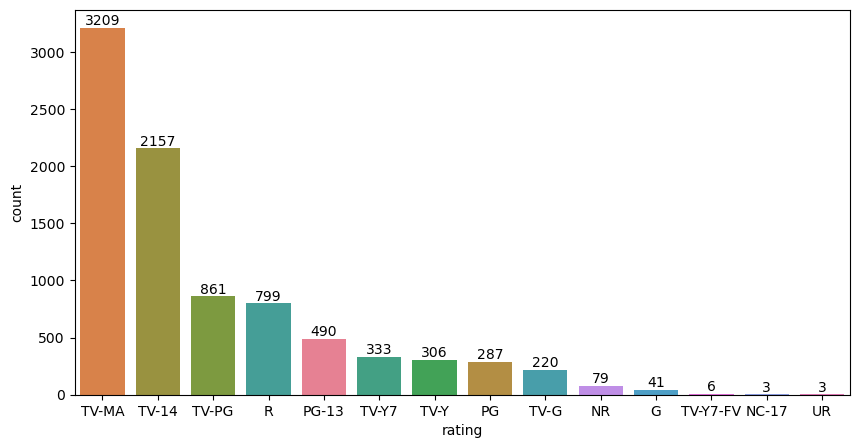

In [39]:
# Ratıng sütunu içerisindeki izlyici kitlesini count grafiği ile görselleştridik.
plt.figure(figsize=(10,5))
ax=sns.countplot(x='rating', data= df, hue='rating', order = df['rating'].value_counts().index);
for p in ax.containers:
    ax.bar_label(p)

In [40]:
df.rating.unique() # Ratıng de bulunan benzersiz değerleri listeledik.

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [41]:
# Rating sütunu içerisinde değerlerin ismini değiştirdik.
rating_map = {'TV-MA':'Yetişkin',
              'R':'Yetişkin',
              'PG-13':'Genç',
              'TV-14':'Genç Yetişkin',
              'TV-PG':'Büyük Çocuklar',
              'NR':'Yetişkin',
              'TV-G':'Çocuk',
              'TV-Y':'Çocuk',
              'TV-Y7':'Büyük Çocuklar',
              'PG':'Büyük Çocuklar',
              'G':'Çocuk',
              'NC-17':'Yetişkin',
              'TV-Y7-FV':'Büyük Çocuklar',
              'UR':'Yetişkin'}

In [42]:
df['rating'].replace(rating_map, inplace = True)# rating_map ,içerisindeki değerleri rating sütunu içine attık.


In [43]:
df['rating'].unique()

array(['Genç', 'Yetişkin', 'Büyük Çocuklar', 'Genç Yetişkin', 'Çocuk'],
      dtype=object)

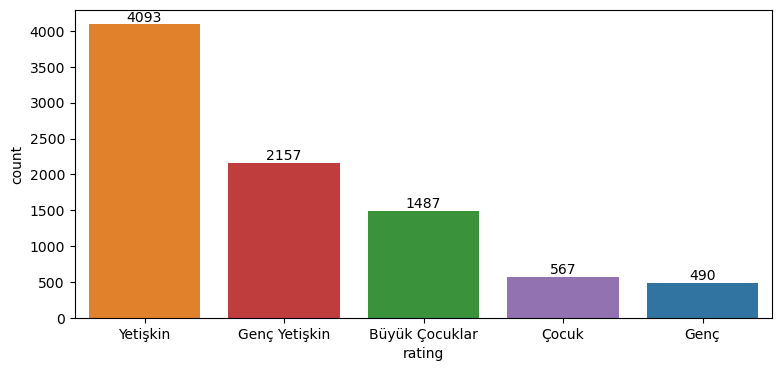

In [44]:
plt.figure(figsize=(9,4))
ax=sns.countplot(x='rating',data=df, hue='rating', order= df['rating'].value_counts().index );
for p in ax.containers:
    ax.bar_label(p)

# Bu grafikle Netflix içersisindeki içeriklerin % 50 den fazla yetişkinler, sonra genç yetişkinler,büyük çocuklar ve çocuklar için son olarakta gençler
# için içerik üretim oranlarını gözlemledik.

In [45]:
df.type.value_counts()

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

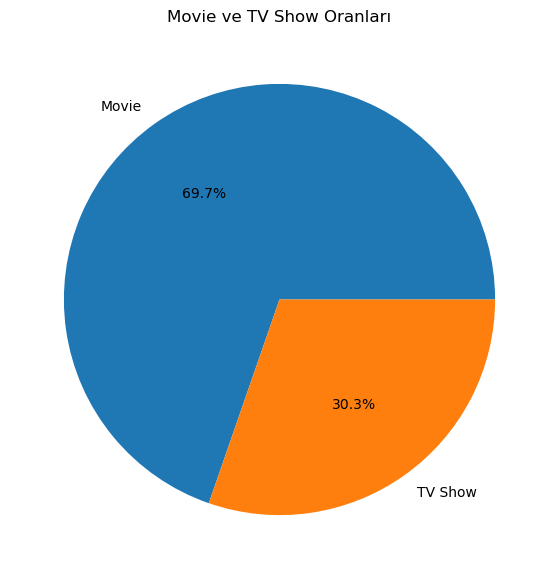

In [46]:
# Netflix type türünde Movie ni Tv show a göre oranını tespit ettik.
plt.figure(figsize=(7,7))
df.type.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Movie ve TV Show Oranları');

In [47]:
# Dİrector sütunundaki değerleri unknown değeri hariç tutularak ilk 10 değer getirildi.
df[(df['director']!='Unknown')].director.value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Martin Scorsese           12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64

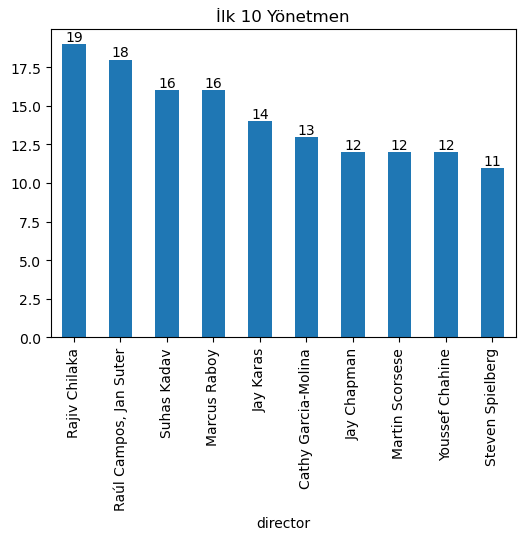

In [48]:
ax=df[(df['director']!='Unknown')].director.value_counts().head(10).plot(kind ='bar');
plt.title('İlk 10 Yönetmen')
for p in ax.containers:
    ax.bar_label(p)

In [49]:
df['country'].value_counts().head(10)

country
United States     3202
India             1008
Unknown            830
United Kingdom     627
Canada             271
Japan              258
France             212
South Korea        211
Spain              181
Mexico             134
Name: count, dtype: int64

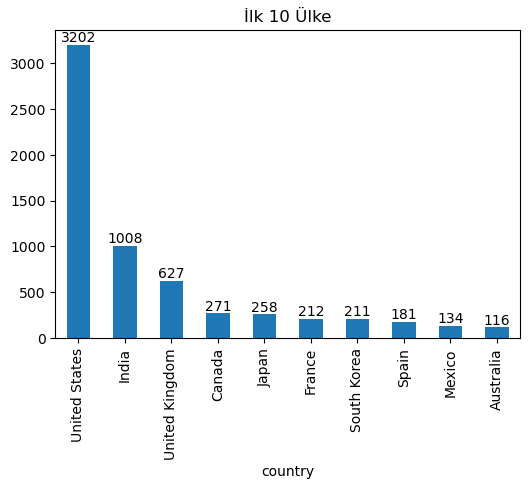

In [50]:
# Ülke bazlı yapılan üretilen film sayilari
ax=df[(df['country']!= 'Unknown')].country.value_counts().head(10).plot(kind= 'bar');
for p in ax.containers:
    ax.bar_label(p)
plt.title('İlk 10 Ülke');

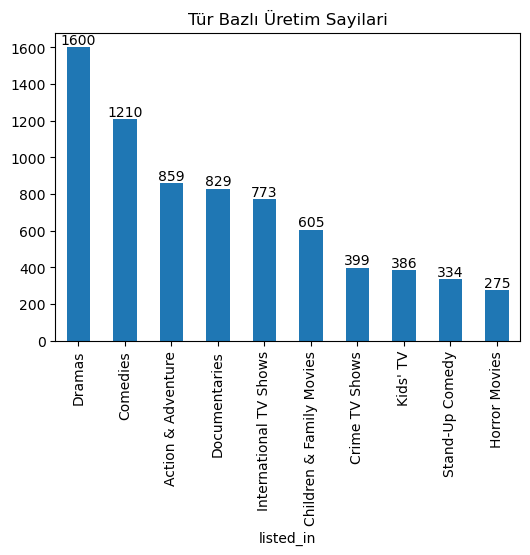

In [51]:
ax=df.listed_in.value_counts().head(10).plot(kind='bar');
for p in ax.containers:
    ax.bar_label(p)
plt.title('Tür Bazlı Üretim Sayilari');

# Dramalar en popüler türdür ve onları komediler ve belgeseller takip etmektedir.
# Bu üç tür tüm film ve TV şovlarının yaklaşık %41'ini oluşturmaktadır.
# Bu değer ilk 10 tür için yaklaşık %82'ye yükselmektedir.

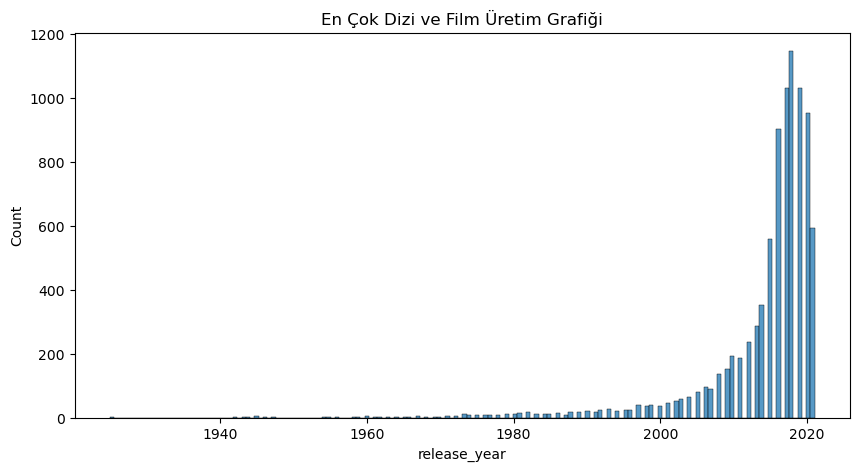

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('En Çok Dizi ve Film Üretim Grafiği');
#bu grafikte eskilere göre daha fazla film izleme olayı var.

In [54]:
df['month_added'].value_counts()

month_added
7     827
12    813
9     769
4     763
10    760
8     754
3     742
1     738
6     728
11    705
5     632
2     563
Name: count, dtype: int64

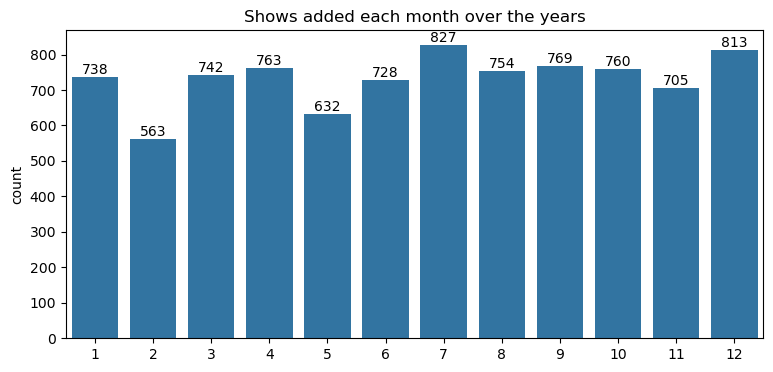

In [55]:
plt.figure(figsize = (9,4)) 
ax=sns.countplot(data = df,x='month_added')
plt.title('Shows added each month over the years')
plt.xlabel('')
for p in ax.containers:
    ax.bar_label(p)

In [56]:
grouped_data = df.groupby(["year_added", "month_added"])["month_added"].count().unstack()  # Unstack komutu group by ile elde edilen değerlere tabloya çevirdi.

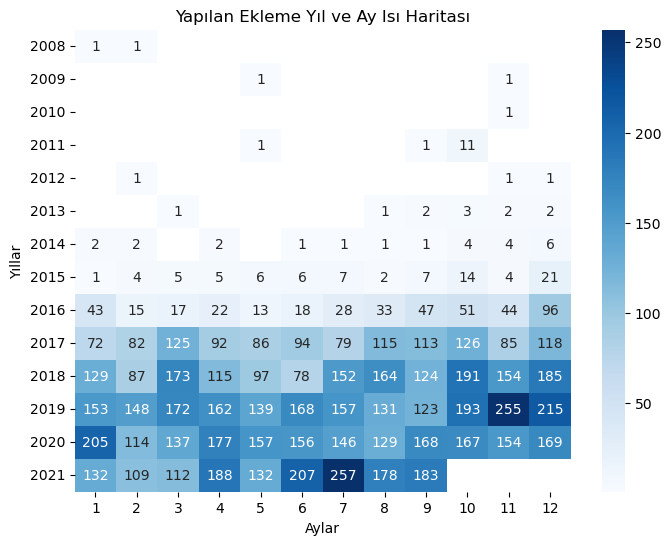

In [57]:
plt.figure(figsize=(8,6)) 
sns.heatmap(grouped_data, annot=True, cmap='Blues', fmt='g') 
plt.title('Yapılan Ekleme Yıl ve Ay Isı Haritası')
plt.xlabel('Aylar')
plt.ylabel('Yıllar')
plt.show()

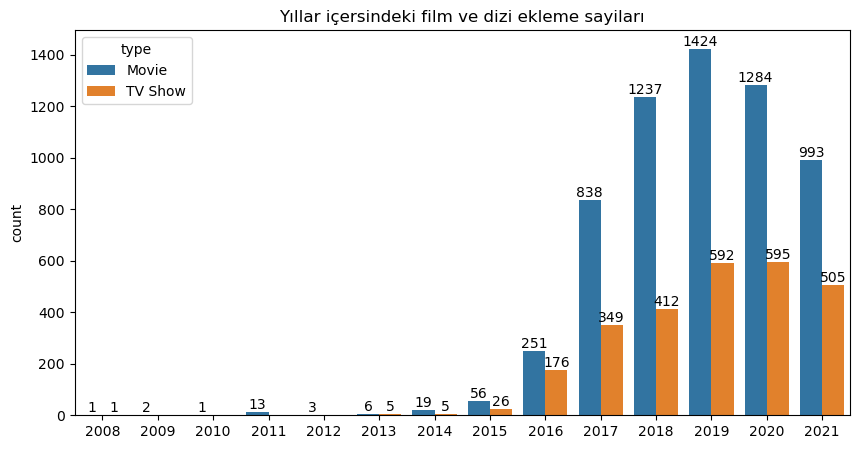

In [152]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
ax= sns.countplot(x='year_added',data=df, hue='type')
plt.title('Yıllar içersindeki film ve dizi ekleme sayiları')
plt.xlabel('')
for p in ax.containers:
    ax.bar_label(p)

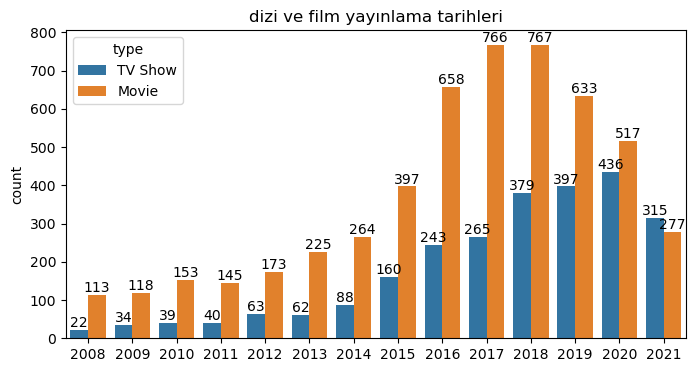

In [154]:
order = range(2008,2022)
plt.figure(figsize=(8,4))
ax = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('dizi ve film yayınlama tarihleri')
plt.xlabel('')
for p in ax.containers:
    ax.bar_label(p)

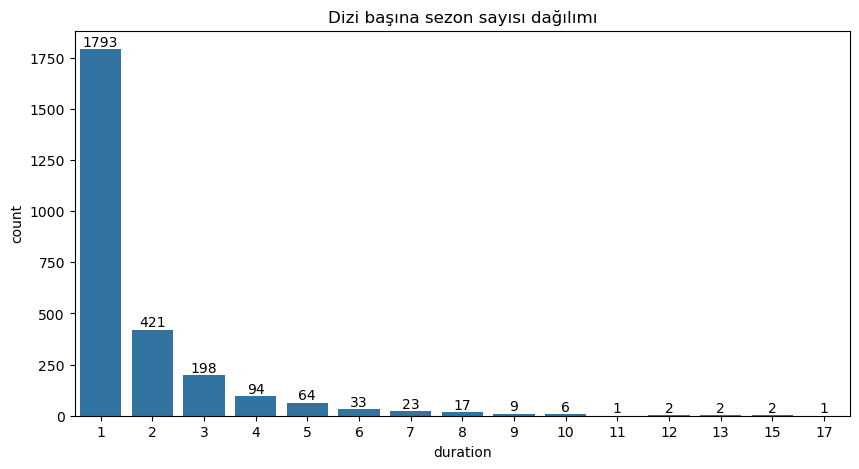

In [60]:
# Seasons in each TV show
plt.figure(figsize=(10,5))
ax = sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Dizi başına sezon sayısı dağılımı')
for p in ax.containers:
    ax.bar_label(p)

## Veri setindeki TV dizileri 16 sezona kadar çıkabilir, ancak bunların büyük çoğunluğu sadece bir sezona sahiptir. 
# Bu, TV dizilerinin çoğunun yakın zamanda başladığı ve daha fazla sezonun yolda olduğu anlamına gelebilir. 
# 8'den fazla sezonu olan çok az TV dizisi vardır.

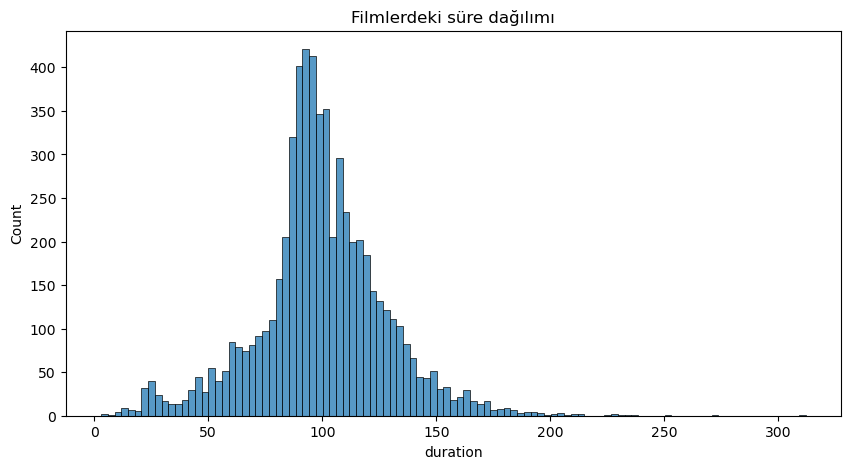

In [62]:
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Filmlerdeki süre dağılımı');

In [63]:
df[df['type']== 'Movie'].duration.describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

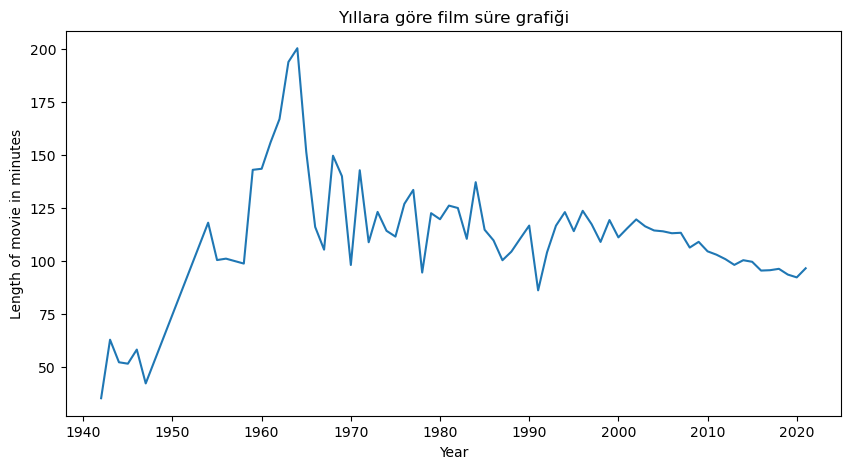

In [64]:
# Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Yıllara göre film süre grafiği')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year');

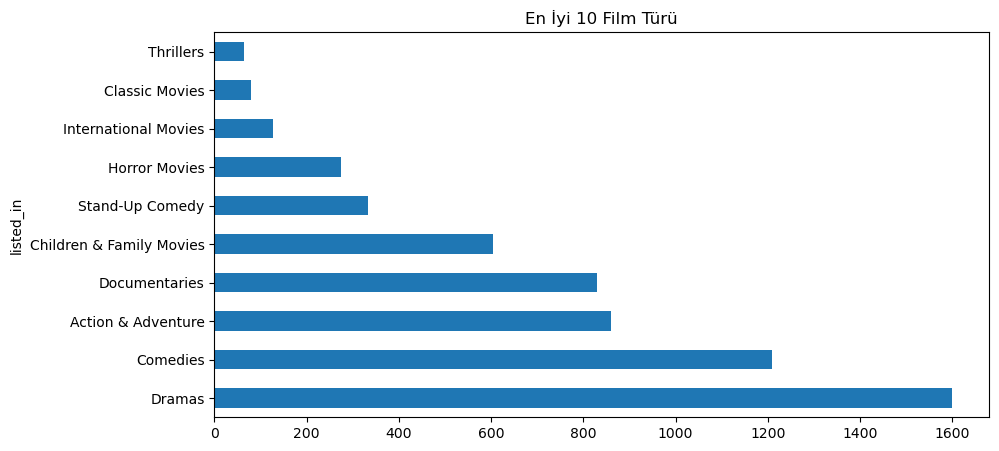

In [65]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('En İyi 10 Film Türü');

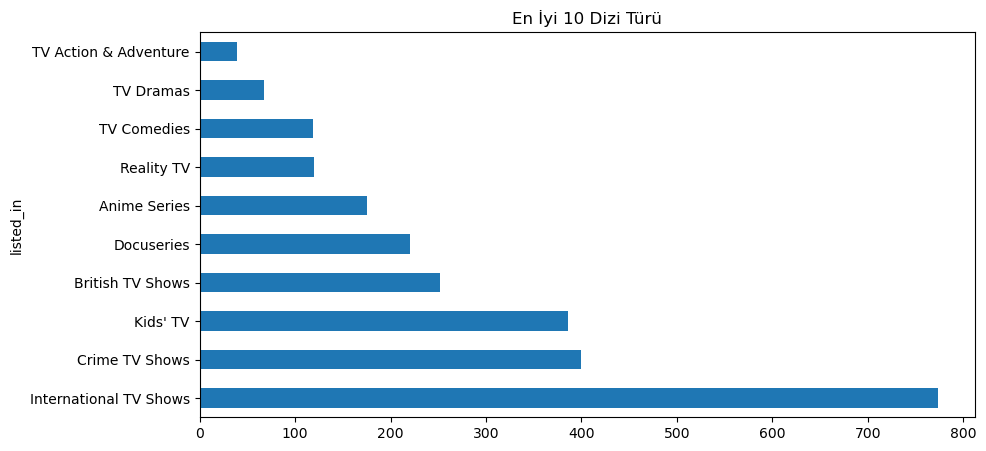

In [66]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('En İyi 10 Dizi Türü');

In [136]:
df_cast_split = df[~(df['cast']=='Unknown') & (df['type']=='Movie')].assign(cast=df['cast'].str.split(', '))
df_cast_exploded = df_cast_split.explode('cast')
df_cast_exploded['cast'].value_counts().nlargest(10)
# 'cast' sütununda 'Unknown' olanları çıkartıyoruz ve sadece 'Movie' türündeki filmleri seçiyoruz
# 'cast' sütunundaki her hücreyi virgül ve boşluklara göre ayırıp, bu hücreleri birer liste haline getiriyoruz
# 'cast' sütunundaki listeleri patlatarak (explode), her oyuncuyu ayrı bir satır haline getiriyoruz
# Patlatılmış 'cast' sütunundaki oyuncu isimlerini sayıyoruz ve en çok görünen 10 tanesini seçiyoruz
# In the 'cast' column, remove the 'Unknown' ones and select only movies of the 'Movie' genre
# Separate each cell in the 'cast' column by commas and spaces and make them into a list
# Explode the lists in the 'cast' column, making each player a separate row
# We count the actor names in the exploded 'cast' column and select the 10 most visible ones


cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Paresh Rawal        28
Julie Tejwani       28
Rupa Bhimani        27
Boman Irani         27
Name: count, dtype: int64

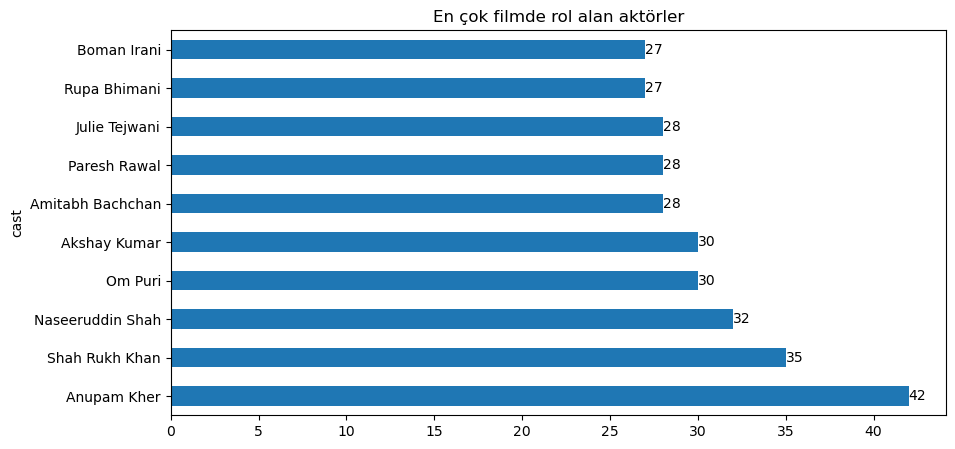

In [138]:
plt.figure(figsize=(10,5))
ax = df_cast_exploded['cast'].value_counts().nlargest(10).plot(kind='barh')
plt.title('En çok filmde rol alan aktörler');
for p in ax.containers:
    ax.bar_label(p);
# Yukarıda elde ettiğimiz veriyi görselleştirme yaptık.
# We visualized the data we obtained above.

In [140]:
from wordcloud import WordCloud
# WordCloud kütüphanesi, metin verisindeki kelimelerin sıklığına göre görselleştirme (kelime bulutu) oluşturmak için kullanılır.
# The WordCloud library is used to create visualizations (word clouds) based on the frequency of words in text data.

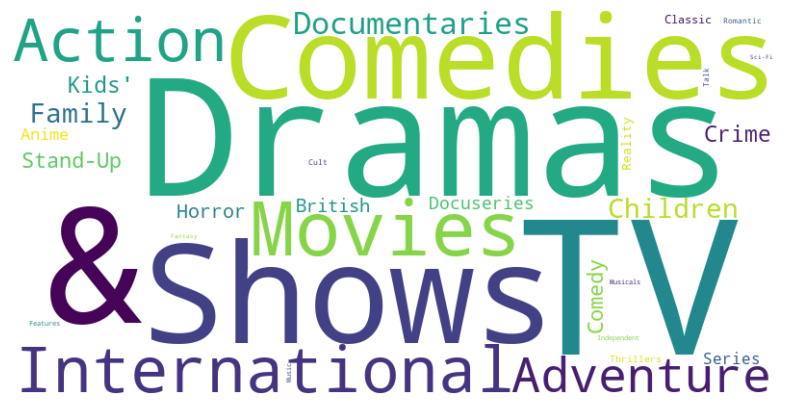

In [150]:
from collections import Counter
# description sütununu birleştirme
# Merge description column
text = ' '.join(df['listed_in'].dropna())
# Metni kelimelere ayırma
# Breaking the text into words
words = text.split()
# Kelimelerin sıklığını sayma
# Metni kelimelere ayırma
word_counts = Counter(words)
# En çok kullanılan ilk 50 kelimeyi alma
# Getting the top 50 most used words
most_common_50 = dict(word_counts.most_common(50))
# En çok kullanılan 10 kelimeyi içeren kelime bulutu oluşturma
# Create a word cloud with the 10 most used words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(most_common_50)
# Kelime bulutunu görselleştirme
# Visualizing the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri kapat (Close axes)
plt.show()